VIEW PSO OUTPUT

In [2]:
clear
close all
%--- read PSO outputs ---%
pso_dir = "/work/gg0877/g260193/modules_gitlab/parameterisation/PSO/";
n_it = 10;  % number of iteration
n_p = 8;   % number of particles/size of the swarm (or runs in an iteration)
%-
var_names = {'Chla', 'NO3', 'PO4', 'SiO'}; %- validated state variables
n_var = length(var_names); 
%-
%- tp.name = {'muPl', 'muPs', 'mPl', 'mPs'};  %- tuned parameters
%- tp.min = [0.65; 0.55; 0.02; 0.04];
%- tp.max = [2.6;  2.2;  0.08; 0.16];
tp_info = readtable(append(pso_dir,"tuned_p_names.txt"));
tp.name = tp_info.Var1;
tp.min = tp_info.Var2;
tp.max = tp_info.Var3;

n_tp = length(tp.name)                    %- number of tuned parameters (or swarm dimension)

g_bcost_it = readtable(append(pso_dir,"g_bestcost_it.txt"));
g_bcost_it(:,1) = [];
g_bcost_it.iter = [1:n_it]';

g_bcost_it = renamevars(g_bcost_it,"Var2","cost");
g_bpos_it = readtable(append(pso_dir,"g_bestpos_it.txt"));  
g_bpos_it.Properties.VariableNames = tp.name;
g_bpos_it.iter = [1:n_it]';

p_bpos_it = readtable(append(pso_dir,"particle_bestpos_it.txt"));
p_bpos_it.Properties.VariableNames = tp.name;
p_bpos_it(n_it*n_p+1:end,:)=[];   %--- this need to be adjusted
p_bpos_it.iter = repelem([1:n_it]',n_p);

p_vel_it = readtable(append(pso_dir,"particle_v_it.txt")); % particle velocity at each iteration
p_vel_it(n_it*n_p+1:end,:)=[];   %% this need to be adjusted
p_vel_it.Properties.VariableNames = tp.name;
p_vel_it.iter = repelem([1:n_it]',n_p);

vars_cost_it = readtable(append(pso_dir,"validated_var_cost_it.txt")); 
vars_cost_it(n_it*n_p+1:end,:) = []; %--- this need to be adjusted
vars_cost_it.Properties.VariableNames = var_names;
vars_cost_it.sum_cost = nansum(table2array(vars_cost_it),2);
vars_cost_it.iter = repelem([1:n_it]',n_p);

gbest_var_cost_it = readtable(append(pso_dir,"g_vars_bcost_it.txt"));
gbest_var_cost_it.Properties.VariableNames = ['sum_wss_mae',var_names];
gbest_var_cost_it.iter = [1:n_it]';


n_tp =

     4



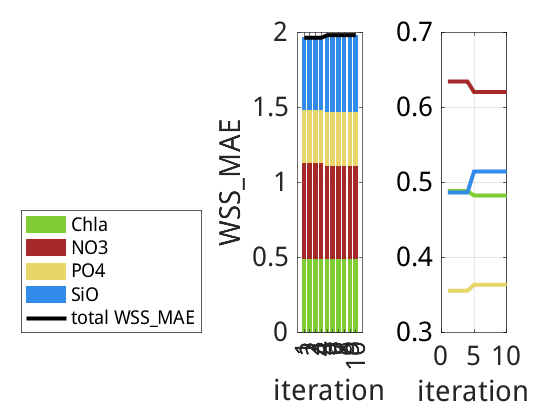

In [3]:
%-----------------------------------%
% PLOT Best cost vs iteration
%-----------------------------------%

figure;
tiledlayout(1,2)
nexttile
H = bar(-table2array(gbest_var_cost_it(:,[2:5])), 'stacked');
colorSet = [0.5 0.8 0.2
            0.65 0.16 0.16
            0.91 0.84 0.42
            0.19 0.55 0.91];
for i = 1:n_var
    set(H(i),'facecolor',colorSet(i,:), 'edgecolor', 'none')
end
clear i
hold on
x = [1:n_it]';
y = -gbest_var_cost_it.sum_wss_mae;
plot(x, y, 'k', 'LineWidth',3)
ylabel('WSS_MAE','interpreter', 'none')
xlabel('iteration')
legend([var_names, {'total WSS_MAE'}],'interpreter', 'none', 'Location','southwestoutside','FontSize',14);
set(gca, 'fontsize', 20)
grid on

nexttile
% yyaxis left
lSet = {'-', '-', '-', '-'};
for v = 1:length(var_names)
    y = -gbest_var_cost_it.(var_names{v});
    x = 1:length(y);
    plot(x, y, 'color', colorSet(v,:), 'LineStyle', lSet{v}, 'LineWidth', 3)
    hold on
end
% ylim([0.48 0.65])
clear v x y H colorSet lSet
% ylabel('Model and Observation Diff.')
xlabel('iteration')
set(gca, 'fontsize', 20,'YColor','k')
grid on
% yyaxis right
%     % best cost plot
% x = 1:size(g_bcost_it,1);
% y = -g_bcost_it;
% plot(x, y,'color', 'k', 'LineWidth',3);
% % ylim([1.5 1.8])
% set(gca, 'fontsize', 20,'YColor','k')
% legend([variable_names,{'total WSS_MAE'}],'interpreter', 'none', 'Location','northwest','FontSize',14);
% legend(var_names,'interpreter', 'none', 'Location','northwest','FontSize',14);
% legend([var_names, {'total WSS_MAE'}],'interpreter', 'none', 'Location','southeastoutside','FontSize',14);


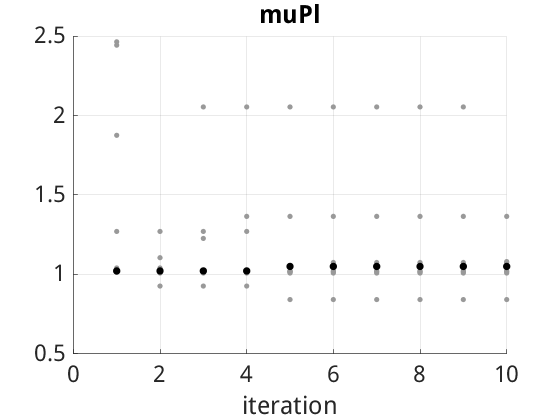

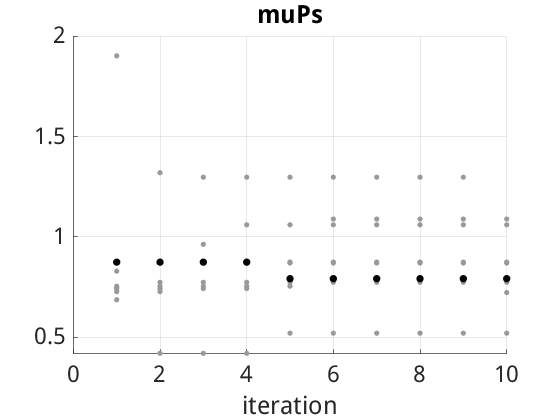

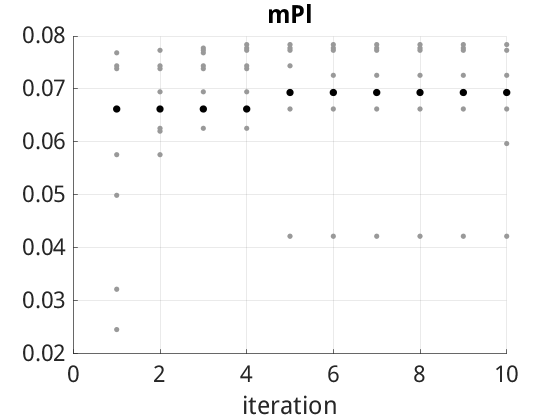

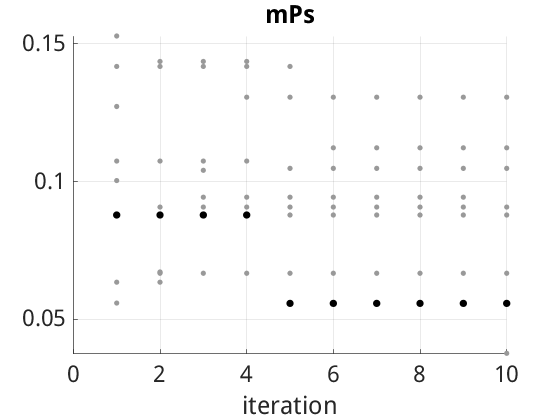

In [4]:
%------------------------%
% parameter move
%-----------------------%
%
gray_color = [0.6 0.6 0.6];
%
%figure;
%tiledlayout(5,8)
for p = 1:n_tp
    %nexttile
    figure;
    x = p_bpos_it.iter;
    y = p_bpos_it.(tp.name{p})*(tp.max(p)-tp.min(p))+tp.min(p);
    scatter(x, y, 15, gray_color, 'filled'); % particles position
    hold on
    % add global best position
    xg = g_bpos_it.iter;
    yg = g_bpos_it.(tp.name{p})*(tp.max(p)-tp.min(p))+tp.min(p);
    scatter(xg, yg, 30, 'k', 'filled'); % global best position
    set(gca, 'fontsize', 17)
    
    %if ismember(p, [3,4])
        xlabel('iteration');
    %else
    %    set(gca, 'XTickLabel','')
    %end
    title(tp.name{p}, 'Interpreter', 'none')
    grid on
end

% % common figure format
% ax=axes('Units','Normal','Position',[.11 .11 .85 .84],'Visible','off');
% set(get(ax,'Title'),'Visible','on');